# **Exploration of the JEE DROPOUT DATA**
## AIMS
- Identify Structure of Data and data outline
- Clean the data of NaNs, corrupt entries and missing values 
- Finding relations that help get a clear view of the data 
- Ensure that teh data is reliable, accurate and relevant
- Visualize the data 
  - Finding patterns, relationships and correlations that better help understand the data
  - Finding the key fields that influence the target variable
  - Checking for relationships that may need tweaking or transformation
## Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pandas for Data exploration with Excel-like formats <br>
Numpy for Numerical and Statistical Analysis<br>
Matplotlib.pyplot for data visualization<br>
## Reading and working on Data


In [3]:
jee = pd.read_csv('../Data/JEE_Dropout_After_Class_12.csv', delimiter=',')
jee

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.7,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.7,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.3,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.0,High,Upto 10th,Urban,Low,No,Yes,0


In [4]:
jee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   jee_main_score        5000 non-null   float64
 1   jee_advanced_score    5000 non-null   float64
 2   mock_test_score_avg   5000 non-null   float64
 3   school_board          5000 non-null   object 
 4   class_12_percent      5000 non-null   float64
 5   attempt_count         5000 non-null   int64  
 6   coaching_institute    3791 non-null   object 
 7   daily_study_hours     5000 non-null   float64
 8   family_income         5000 non-null   object 
 9   parent_education      5000 non-null   object 
 10  location_type         5000 non-null   object 
 11  peer_pressure_level   5000 non-null   object 
 12  mental_health_issues  5000 non-null   object 
 13  admission_taken       5000 non-null   object 
 14  dropout               5000 non-null   int64  
dtypes: float64(5), int64(

In [5]:
jee.describe


<bound method NDFrame.describe of       jee_main_score  jee_advanced_score  mock_test_score_avg school_board  \
0              78.95               59.22                59.86         CBSE   
1              70.06               58.75                64.33        State   
2              81.07               37.27                60.83         ICSE   
3              93.32               60.72                69.33         ICSE   
4              68.72               77.73                82.37         CBSE   
...              ...                 ...                  ...          ...   
4995           71.31               86.82                57.08        State   
4996           81.96               34.03                82.85         CBSE   
4997          100.00               54.71                83.75         CBSE   
4998           83.31               73.93                57.39         CBSE   
4999           60.13               76.31                66.15        State   

      class_12_percent  attem

In [6]:
jee.shape

(5000, 15)

In [7]:
jee.shape[0]


5000

<p style="font-size:25px">
Going with a common stereotype and comparing if <b>mental health issues</b> and <b>status of admission taken</b> influences if a student drops out of JEE prep 
</p>

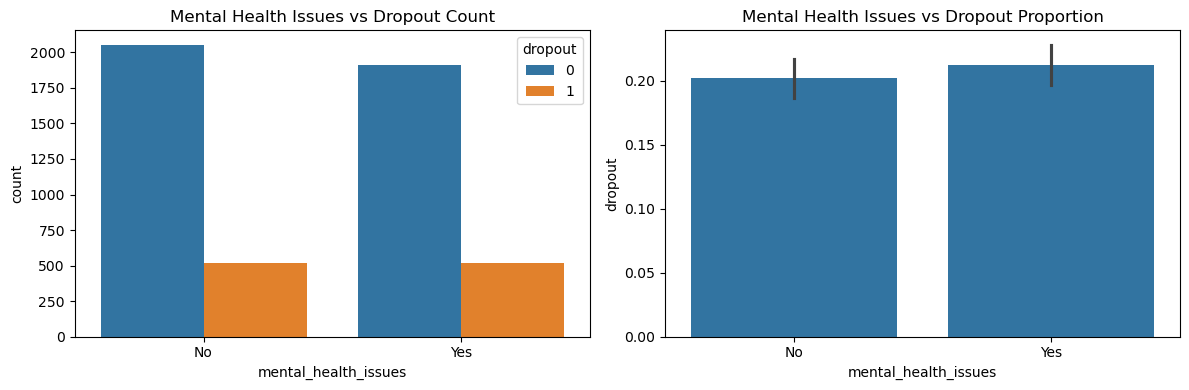

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.countplot(x='mental_health_issues', hue='dropout', data=jee, ax=axes[0])
axes[0].set_title('Mental Health Issues vs Dropout Count')

sns.barplot(x='mental_health_issues', y='dropout', data=jee, ax=axes[1])
axes[1].set_title('Mental Health Issues vs Dropout Proportion')

plt.tight_layout()
plt.show()

<p style='font-size:20px'>
Most students are continuing in their JEE prep even after suffering from mental health problems with over <b>2000</b> continuing without and close to <b>2000</b> continuing after suffering from mental illnesses 
Proportions confirm that mental illnesses do not play a major role in influencing student dropouts
It seems that Mental Illnesses do not have a significant impact on student dropouts
</p>
 

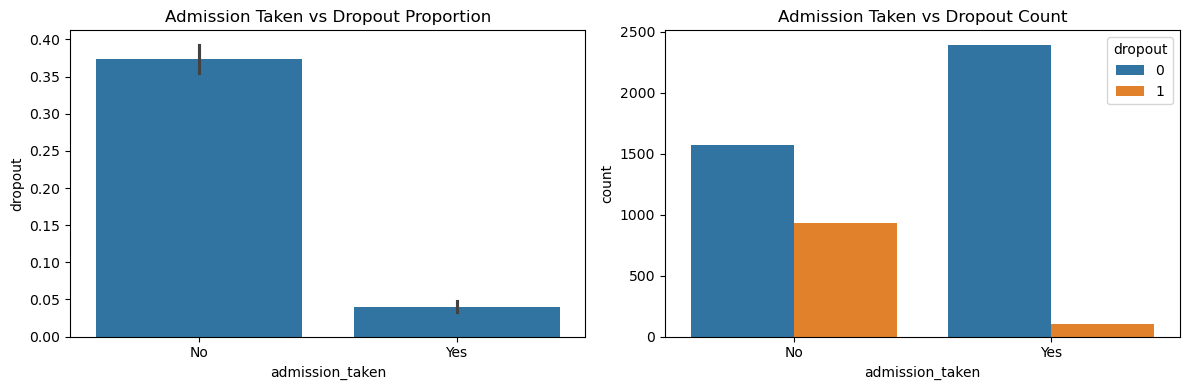

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.barplot(x='admission_taken', y='dropout', data=jee, ax=axes[0])
axes[0].set_title("Admission Taken vs Dropout Proportion")

sns.countplot(x="admission_taken", hue="dropout", data=jee, ax=axes[1])
axes[1].set_title("Admission Taken vs Dropout Count")

plt.tight_layout()
plt.show()

<p style="font-size: 27px">
<b>Exploratory Data Analysis</b>
</p>
<p style="font-size: 25px">
Using Cramer's V and chi2 Square method to find if there are any relations between columns with categorical values
</p>

In [10]:
import scipy.stats as stats
def cramers_v(confusion_matrix):
  chi2 = stats.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2=chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

target = 'dropout'
for col in jee.columns:
  if col == target:
    continue
  try:
    contingency = pd.crosstab(jee[col],jee[target])
    chi2, p, dof, ex = stats.chi2_contingency(contingency)
    cramer_v = cramers_v(contingency)
    print(f"\n Feature: {col}")
    print(f"Chi square p-value: {p}")
    
    if p < 0.05:
      print(f"Statistically significant relationship")
      print(f"Cramer's V: {cramer_v}")
    else:
      print(f"No Significant relationship")
  except Exception as e:
    print(f"Skipping {col} due to error: {e}")


 Feature: jee_main_score
Chi square p-value: 0.2054810036708812
No Significant relationship

 Feature: jee_advanced_score
Chi square p-value: 0.7866470247268562
No Significant relationship

 Feature: mock_test_score_avg
Chi square p-value: 0.47292898142439566
No Significant relationship

 Feature: school_board
Chi square p-value: 0.905274373764119
No Significant relationship

 Feature: class_12_percent
Chi square p-value: 0.2608158811316311
No Significant relationship

 Feature: attempt_count
Chi square p-value: 0.3919959148923229
No Significant relationship

 Feature: coaching_institute
Chi square p-value: 0.1139041870788369
No Significant relationship

 Feature: daily_study_hours
Chi square p-value: 5.7243048299453145e-24
Statistically significant relationship
Cramer's V: 0.20700128642136384

 Feature: family_income
Chi square p-value: 0.0
Statistically significant relationship
Cramer's V: 0.5682427792825734

 Feature: parent_education
Chi square p-value: 0.4716007938247422
No Signi

<p style="font-size:20px">
Observing both the p and the Cramer_V values, we can say that <b>Family_Income</b> has the most influence over a student's chances of dropping out. <br>Other columns such as <b>Admission_Taken</b> and <b>Daily_Study_Hours</b> have influence on "dropout" as well. <br>And <b>Peer_Pressure_Level</b> has some predictive power on the dropout chances.
</p>

<p style="font-size:20px">
Even then, it is important to explore the data visually to understand how these data interact and relate with each other
</p>

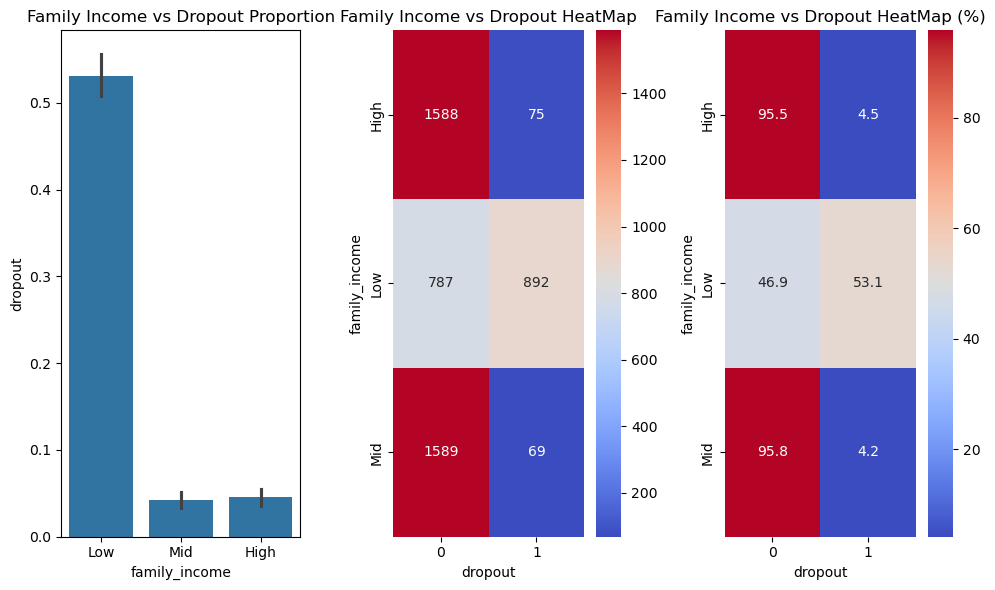

In [67]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10,6))
sns.barplot(x="family_income", y="dropout", data=jee, ax=axes[0])
axes[0].set_title("Family Income vs Dropout Proportion")
sns.heatmap(pd.crosstab(jee['family_income'], jee['dropout']), annot=True, fmt='d', cmap='coolwarm', ax=axes[1])
axes[1].set_title("Family Income vs Dropout HeatMap")
crosstab = pd.crosstab(jee["family_income"], jee["dropout"], normalize='index') * 100
sns.heatmap(crosstab, annot=True, fmt='.1f', cmap='coolwarm', ax=axes[2])
axes[2].set_title("Family Income vs Dropout HeatMap (%)")
plt.tight_layout()
plt.show()

<p style="font-size: 27px">
It is observed that most amount of students dropping out come from <b>Low income families</b> which can be a <b>major</b> indicator.
</p>

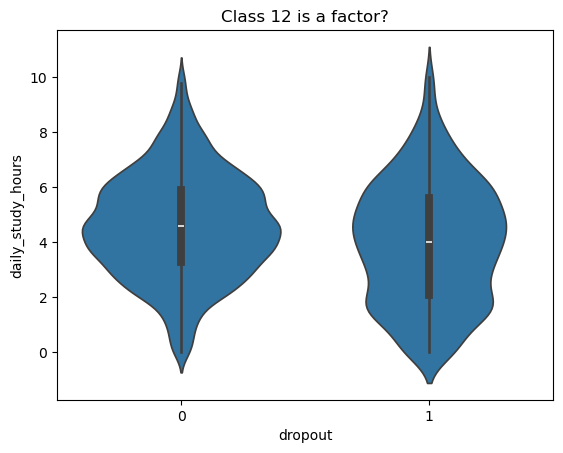

In [51]:
sns.violinplot(x="dropout",y="daily_study_hours", data=jee)
plt.title("Class 12 is a factor?")
plt.show()

<Axes: xlabel='dropout', ylabel='daily_study_hours'>

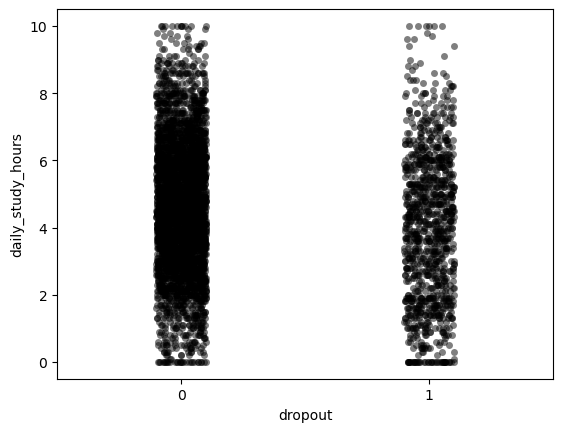

In [71]:
sns.stripplot(x='dropout', y='daily_study_hours', data=jee, color='k', alpha=0.5, jitter=True)

<p style="font-size: 27px">
Here we can observe that students that dropout mainly study for 2 - 6 hours 
</p>

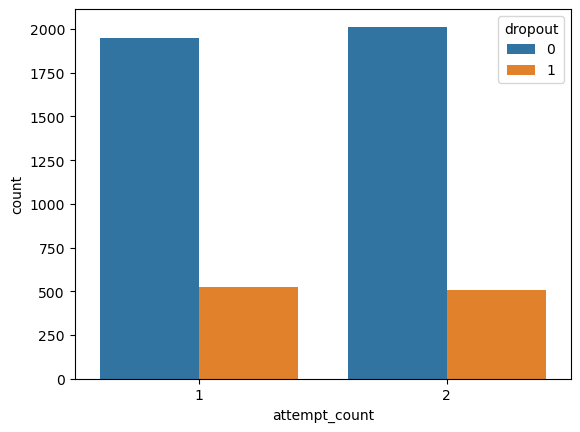

In [66]:
sns.countplot(x="attempt_count",hue="dropout", data=jee)
plt.show()

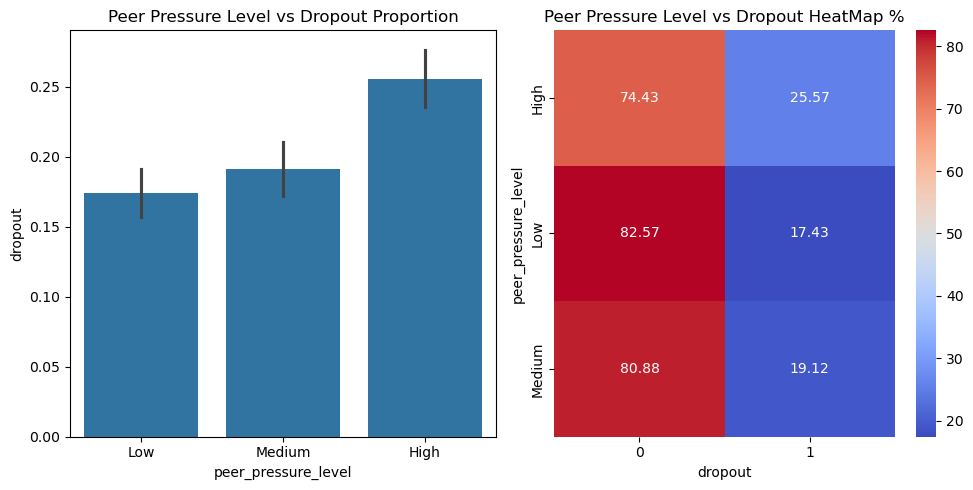

In [78]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.barplot(x="peer_pressure_level", y="dropout", data = jee, ax=axes[0])
axes[0].set_title("Peer Pressure Level vs Dropout Proportion")
crosstab = pd.crosstab(jee["peer_pressure_level"], jee["dropout"], normalize='index') * 100
sns.heatmap(crosstab, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1])
axes[1].set_title("Peer Pressure Level vs Dropout HeatMap %")
plt.tight_layout()
plt.show()

<p style="font-size: 27px">
A considerable amount of students are bowing to peer pressure (25% and 20%) and are seen to be dropping out of JEE prep
</p>

# Conclusion

<p style="font-size: 25px">
After visualizing the data and finding the strength of relationships, we found three potential markers that influence the dropout rates.
<ul style="fotn-size: 25px">
  <li>daily_study_hours</li>
  <li>admission_taken</li>
  <li>peer_pressure_level</li>
</ul>
</p>
<p style="font-size: 27px">
However, in the next <b>"Feature Engineering"</b> notebook, we will come up with some made-up fields that combine the original fields to find more factors that may interact and influence the dropout rates. 
<br>Examples - <b>Expected_Peer_Pressure</b>, <b>Study_Output_Ratio</b>
<br>
which will be evaluated for their impact on dropout rates on <b>"Exploration 2"</b> notebook
</p>